In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model


In [6]:
county_df = pd.read_csv('data/agri/minnesota_county_location.csv')


In [16]:
county_df[county_df['county_name'] =='Mower County']

,county_name,capital_name,county_latitude,county_longitude
49,Mower County,Austin,43.668093,-92.97449


In [42]:
county_df.head()

,county_name,capital_name,county_latitude,county_longitude
0,Aitkin County,Aitkin,46.571482,-93.384760
1,Anoka County,Anoka,45.271020,-93.282763
2,Becker County,Detroit Lakes,46.817181,-95.845325
3,Beltrami County,Bemidji,47.478542,-94.890787
4,Benton County,Foley,45.663512,-93.913728


In [43]:
station_df = pd.read_csv('data/weather/Minnesota Station location list.csv')

In [44]:
station_df.head()

,Code,Latitude,Longitude
0,72655,45.5466,-94.0599
1,72747,48.5667,-93.4000
2,72658,44.8667,-93.0500
3,72745,46.8333,-92.2167
4,KAXN0,45.8663,-95.3947


### We want to find the nearest weather station for every county, because that  is going to be the most relevant


In [45]:
def find_nearest(row):
    lat = row['county_latitude']
    lon = row['county_longitude']
    distances = np.sqrt(np.power(lat - station_df['Latitude'], 2) + np.power(lon - station_df['Longitude'], 2))
    closest_idx = np.argmin(distances)
    # print(distances[closest_idx])
    return station_df.iloc[closest_idx]['Code']

In [46]:
county_df['closest_station'] = county_df.apply(lambda row:find_nearest(row), axis=1)

In [47]:
county_df.head()

,county_name,capital_name,county_latitude,county_longitude,closest_station
0,Aitkin County,Aitkin,46.571482,-93.384760,KHZX0
1,Anoka County,Anoka,45.271020,-93.282763,9NRIJ
2,Becker County,Detroit Lakes,46.817181,-95.845325,KDTL0
3,Beltrami County,Bemidji,47.478542,-94.890787,72755
4,Benton County,Foley,45.663512,-93.913728,72655


In [48]:
county_df.to_csv('data/agri/county-location-closest.csv')

In [7]:
prod_df = pd.read_csv('./agri/minnesota_county_yearly_agricultural_production.csv')

In [13]:
prod_df[prod_df['County'] == 'M']

,Year,County,Commodity,Crop,ACRES HARVESTED,"PRODUCTION, MEASURED IN BU","YIELD, MEASURED IN BU / ACRE"


In [6]:
corn = prod_df[prod_df['Crop'] == 'CORN, GRAIN']

In [7]:
corn[corn['Year'] == 2000].head(20)

,Year,County,Commodity,Crop,ACRES HARVESTED,"PRODUCTION, MEASURED IN BU","YIELD, MEASURED IN BU / ACRE"
43734,2000,ANOKA,CORN,"CORN, GRAIN","7,800","795,600",102.0
43740,2000,BECKER,CORN,"CORN, GRAIN","15,100","1,449,600",96.0
43752,2000,BELTRAMI,CORN,"CORN, GRAIN",800,"78,400",98.0
43763,2000,BENTON,CORN,"CORN, GRAIN","48,700","4,967,400",102.0
43772,2000,BIG STONE,CORN,"CORN, GRAIN","69,800","9,841,800",141.0
43781,2000,BLUE EARTH,CORN,"CORN, GRAIN","180,900","26,773,200",148.0
43788,2000,BROWN,CORN,"CORN, GRAIN","142,400","21,929,600",154.0
43798,2000,CARLTON,CORN,"CORN, GRAIN",200,"20,800",104.0
43804,2000,CARVER,CORN,"CORN, GRAIN","53,000","8,374,000",158.0
43814,2000,CASS,CORN,"CORN, GRAIN","4,200","340,200",81.0


In [8]:
county_avg_yield = corn[['County', 'YIELD, MEASURED IN BU / ACRE']].groupby('County').mean().sort_values(by=['YIELD, MEASURED IN BU / ACRE'], ascending=False)

In [49]:
county_avg_yield.index

TypeError: 'Index' object is not callable

In [10]:
county_avg_yield[len(county_avg_yield)-5:]

,"YIELD, MEASURED IN BU / ACRE"
County,
PENNINGTON,61.967241
KOOCHICHING,55.750000
ITASCA,54.371053
ST. LOUIS,50.350000
LAKE OF THE WOODS,44.882353


In [11]:
county_avg_yield['YIELD, MEASURED IN BU / ACRE'].describe()

count     77.000000
mean      94.022630
std       21.225465
min       44.882353
25%       76.796970
50%       95.494366
75%      110.687500
max      126.798611
Name: YIELD, MEASURED IN BU / ACRE, dtype: float64

<AxesSubplot:xlabel='Year'>

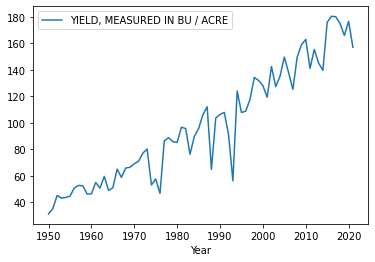

In [12]:
corn.groupby(['Year']).mean().plot()

In [37]:
corn_mean = corn.groupby(['Year']).mean()
print(corn_mean.columns)

Index(['YIELD, MEASURED IN BU / ACRE'], dtype='object')


In [63]:
X = np.array(corn_mean.index)
X = X.reshape(-1, 1)

Y = np.array(corn_mean)
Y = Y.reshape(-1, 1)

In [64]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

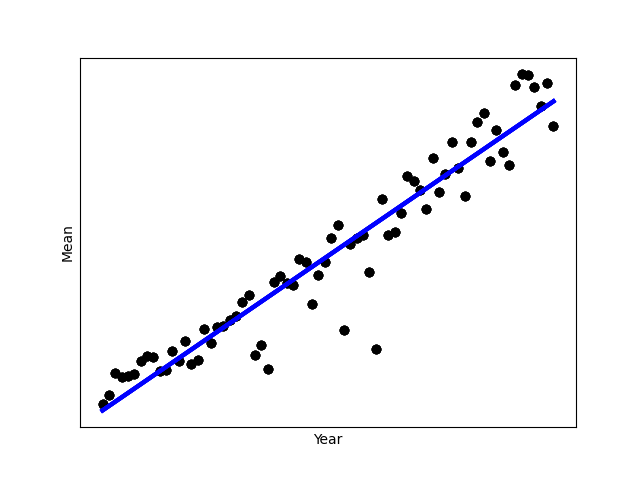

In [72]:
plt.scatter(X, Y,  color='black')
plt.plot(X, regr.predict(X), color='blue', linewidth=3)
plt.xlabel('Year')
plt.ylabel('Mean')
plt.show()

In [89]:
regr.coef_.


[array([1.96966271])]

In [90]:
Y2 = [elem - index * 1.96966271 for index, elem in enumerate(Y)]

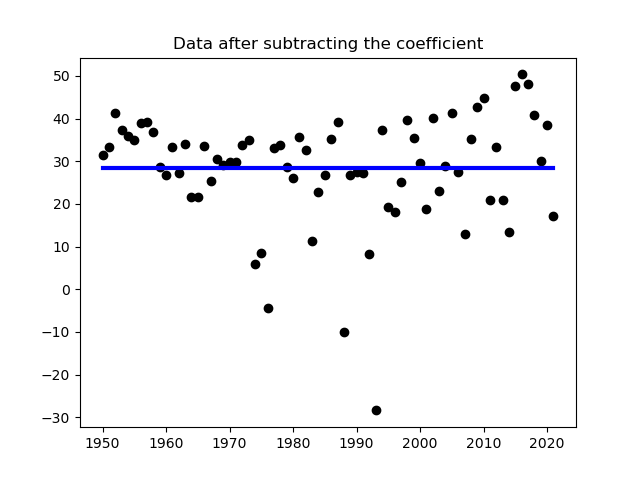

In [100]:
regr.fit(X, Y2)

plt.cla()
plt.plot(X, regr.predict(X), color='blue', linewidth=3)
plt.scatter(X, Y2,  color='black')
plt.title('Data after subtracting the coefficient')
plt.show()

In [109]:
sample_weather_df = pd.read_csv('data/weather/minnesota_daily/9NRIJ.csv')

In [114]:
sample_weather_df['8.0'].shift(1)

0      NaN
1      1.8
2      1.5
3      4.4
4      7.0
5     11.9
6     10.6
7      7.8
8      7.7
9      9.8
10    11.5
11    13.3
12    15.5
13    18.3
14    15.4
15    19.9
16    19.7
17    20.2
18    21.7
19    20.6
20    18.9
21    18.3
22    16.8
23    15.9
24    17.5
25    16.5
26    14.7
27     9.7
28     9.3
29    12.9
30    16.1
31    11.0
32    11.7
33    16.4
34    23.2
35    23.6
36    23.6
37    18.3
38    15.8
39    18.8
40    14.9
41    17.8
42    18.3
43    19.5
44    16.9
45    19.0
46    20.1
47    20.7
48    21.7
49    21.0
50    22.3
51    28.6
52    21.9
53    21.4
Name: 8.0, dtype: float64

In [116]:
sample_weather_df['new'] = sample_weather_df['8.0'].shift(1)

In [121]:
sample_weather_df['diff'] = -sample_weather_df['new']+sample_weather_df['8.0']

In [122]:
sample_weather_df.corr()

C:\Users\peter\AppData\Local\Temp\ipykernel_17928\1566720278.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sample_weather_df.corr()


,8.0,3.0,14.0,0.0,new,diff
8.0,1.000000,0.919533,0.959701,0.195233,0.869976,0.145681
3.0,0.919533,1.000000,0.815282,0.334977,0.878660,-0.031635
14.0,0.959701,0.815282,1.000000,0.143683,0.756403,0.286590
0.0,0.195233,0.334977,0.143683,1.000000,0.268335,-0.186588
new,0.869976,0.878660,0.756403,0.268335,1.000000,-0.361095
diff,0.145681,-0.031635,0.286590,-0.186588,-0.361095,1.000000


In [123]:
sample_weather_df

,2022-04-24,8.0,3.0,14.0,0.0,new,diff
0,2022-04-25,1.8,0.0,4.0,0.3,NaN,NaN
1,2022-04-26,1.5,-2.0,6.0,0.0,1.8,-0.3
2,2022-04-27,4.4,-2.0,11.0,0.0,1.5,2.9
3,2022-04-28,7.0,3.0,11.0,0.0,4.4,2.6
4,2022-04-29,11.9,8.0,17.0,0.0,7.0,4.9
5,2022-04-30,10.6,8.0,13.0,14.6,11.9,-1.3
6,2022-05-01,7.8,6.0,9.0,6.3,10.6,-2.8
7,2022-05-02,7.7,5.0,11.0,0.0,7.8,-0.1
8,2022-05-03,9.8,6.0,15.0,0.0,7.7,2.1
9,2022-05-04,11.5,2.0,18.0,0.0,9.8,1.7


In [127]:
sample_weather_df['minmax_dif'] = abs(sample_weather_df['14.0']-sample_weather_df['3.0'])

In [128]:
sample_weather_df.corr()

C:\Users\peter\AppData\Local\Temp\ipykernel_17928\1566720278.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sample_weather_df.corr()


,8.0,3.0,14.0,0.0,new,diff,minmax_dif
8.0,1.000000,0.919533,0.959701,0.195233,0.869976,0.145681,0.274734
3.0,0.919533,1.000000,0.815282,0.334977,0.878660,-0.031635,-0.093912
14.0,0.959701,0.815282,1.000000,0.143683,0.756403,0.286590,0.499940
0.0,0.195233,0.334977,0.143683,1.000000,0.268335,-0.186588,-0.261177
new,0.869976,0.878660,0.756403,0.268335,1.000000,-0.361095,-0.060829
diff,0.145681,-0.031635,0.286590,-0.186588,-0.361095,1.000000,0.518871
minmax_dif,0.274734,-0.093912,0.499940,-0.261177,-0.060829,0.518871,1.000000
